In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import cluster

import dtale

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('default')  # 'dark_background'

In [66]:
batting = pd.read_csv("Batting.csv")
fielding = pd.read_csv("Fielding.csv")
#pitching = pd.read_csv("Pitching.csv")

In [67]:
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110490,zimmejo02,2021,1,MIL,NL,2,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
110491,zimmeky01,2021,1,KCA,AL,52,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
110492,zimmery01,2021,1,WAS,NL,110,255,27,62,16,...,46.0,0.0,0.0,16,77.0,0.0,0.0,0.0,2.0,9.0
110493,zuberty01,2021,1,KCA,AL,31,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#pitching

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49425,zeuchtj01,2021,1,TOR,AL,0,2,5,3,0,...,0.0,0,0.0,0,74.0,0,16,0.0,0.0,2.0
49426,zimmebr02,2021,1,BAL,AL,4,5,14,13,0,...,0.0,0,2.0,1,285.0,0,37,1.0,2.0,3.0
49427,zimmejo02,2021,1,MIL,NL,0,0,2,0,0,...,0.0,0,1.0,0,26.0,1,5,0.0,0.0,1.0
49428,zimmeky01,2021,1,KCA,AL,4,1,52,2,0,...,1.0,9,0.0,0,223.0,9,32,0.0,4.0,13.0


In [69]:
fielding
#fielding.drop(['lgID', 'PB', 'WP', 'SB', 'CS', 'ZR'], axis = 1, inplace = True)
#fielding.dropna(axis = 0, how = 'any', inplace = True)

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abercda01,1871,1,TRO,NaN,SS,1,1.0,24.0,1,3,2.0,0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,22.0,606.0,67,72,42.0,5,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,3.0,96.0,8,14,7.0,0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,0.0,18.0,1,4,0.0,0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,29.0,729.0,51,3,7.0,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147075,zimmejo02,2021,1,MIL,NL,P,2,0.0,17.0,0,1,0.0,0,NaN,NaN,0.0,0.0,NaN
147076,zimmeky01,2021,1,KCA,AL,P,52,2.0,162.0,4,5,0.0,3,NaN,NaN,2.0,1.0,NaN
147077,zimmery01,2021,1,WAS,NL,1B,54,45.0,1202.0,338,15,0.0,30,NaN,NaN,NaN,NaN,NaN
147078,zuberty01,2021,1,KCA,AL,P,31,0.0,82.0,1,3,0.0,0,NaN,NaN,0.0,0.0,NaN


In [70]:
aggregation_functions_f = {'POS': 'first', 'G': 'sum','GS': 'sum', 'InnOuts':'sum','PO':'sum','A':'sum','E':'sum','DP':'sum'}
combined_f = fielding.groupby(fielding['playerID']).aggregate(aggregation_functions_f)
aggregation_functions_b = {'G': 'sum','AB': 'sum', 'R':'sum','H':'sum','2B':'sum','3B':'sum','HR':'sum','RBI':'sum','SB':'sum','CS':'sum','BB':'sum','SO':'sum','IBB':'sum','HBP':'sum','SH':'sum','SF':'sum','GIDP':'sum'}
combined_b = batting.groupby(fielding['playerID']).aggregate(aggregation_functions_b)
merged_df = pd.merge(combined_f,combined_b, on='playerID',how = 'outer')
merged_df = merged_df.fillna(0)

In [71]:
merged_df

,POS,G_x,GS,InnOuts,PO,A,E,DP,G_y,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,P,331,0.0,1011.0,11,29,3.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaronha01,OF,3020,2977.0,78414.0,7436,429,144.0,218,2256.0,6349.0,...,794.0,188.0,84.0,738.0,980.0,60.0,51.0,55.0,45.0,128.0
aaronto01,1B,387,206.0,6472.0,1317,113,22.0,124,1035.0,2955.0,...,342.0,75.0,32.0,343.0,507.0,28.0,8.0,32.0,12.0,65.0
aasedo01,P,448,91.0,3328.0,67,135,13.0,10,741.0,1628.0,...,222.0,35.0,12.0,128.0,349.0,5.0,21.0,18.0,10.0,40.0
abadan01,1B,9,4.0,138.0,37,1,1.0,3,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zupofr01,C,13,1.0,114.0,31,1,2.0,0,223.0,707.0,...,87.0,29.0,19.0,49.0,59.0,6.0,2.0,3.0,7.0,12.0
zuvelpa01,SS,201,136.0,3844.0,267,415,23.0,84,733.0,1590.0,...,233.0,6.0,4.0,147.0,316.0,10.0,21.0,12.0,17.0,42.0
zuverge01,P,265,31.0,1847.0,45,145,7.0,10,483.0,1082.0,...,97.0,16.0,8.0,79.0,153.0,8.0,7.0,10.0,7.0,19.0


In [72]:
d = dtale.show(merged_df)
d

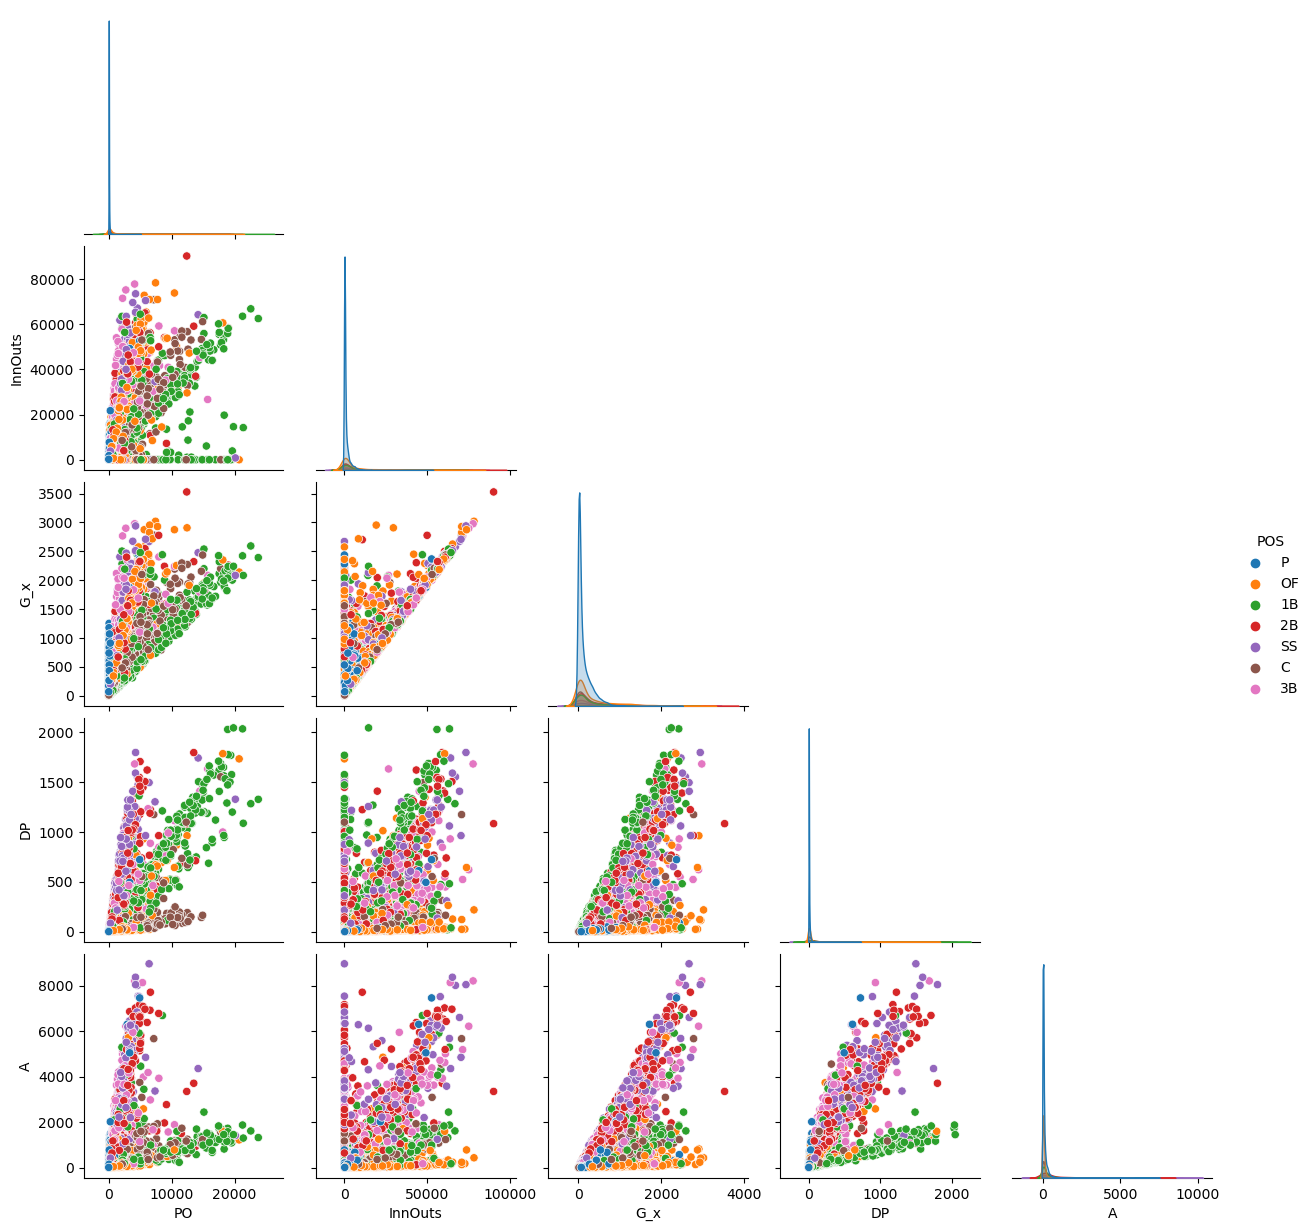

In [73]:
sns.pairplot(data = merged_df,hue='POS', corner = True,x_vars=['PO','InnOuts','G_x','DP','A'],y_vars=['PO','InnOuts','G_x','DP','A'])

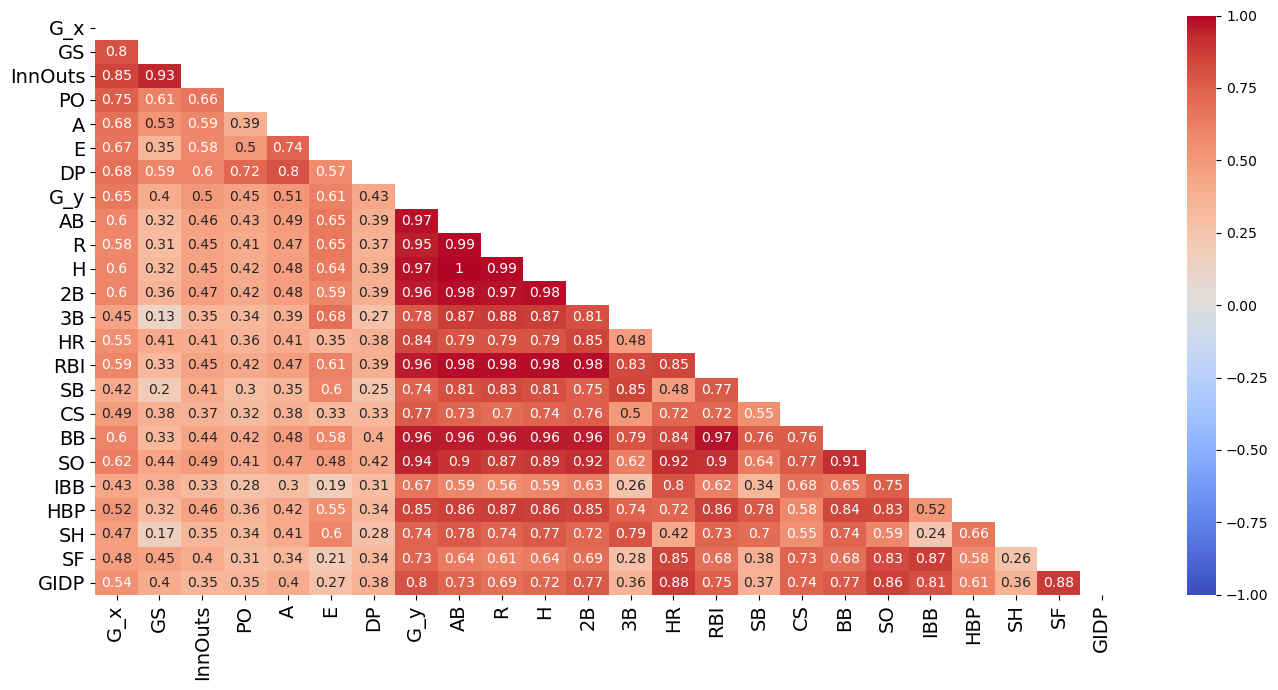

In [74]:
corr = merged_df.corr()
fig, ax = plt.subplots(figsize=(14,7))
mask = np.zeros_like(corr, dtype=bool)  
mask[np.triu_indices_from(mask)] = True  
ax = sns.heatmap(corr.round(2), mask=mask, ax=ax, annot=True, vmin=-1, vmax=1,annot_kws={'fontsize':10}, cmap='coolwarm')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
plt.tight_layout()
plt.show()

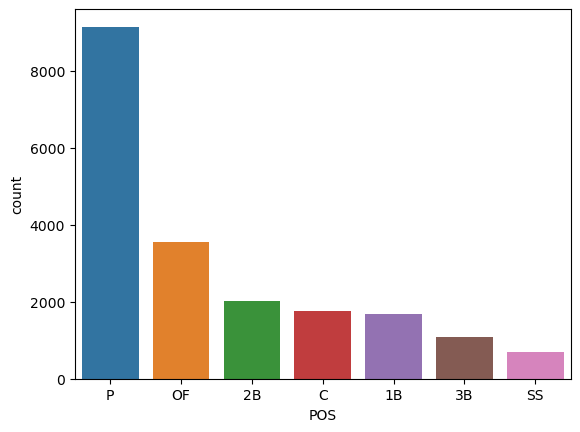

In [75]:
ax = sns.countplot(x="POS",data=merged_df,order=merged_df['POS'].value_counts().index)

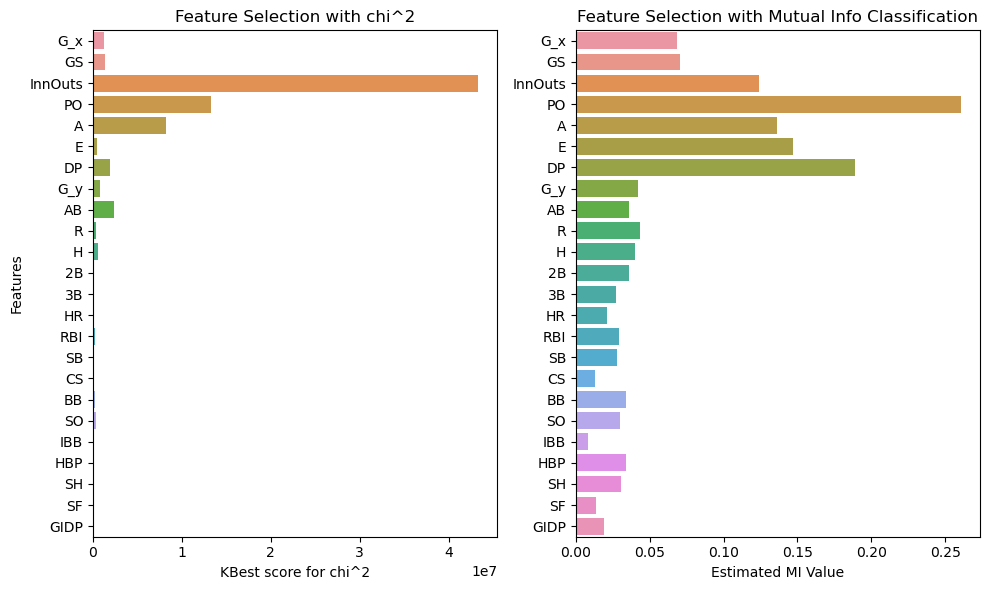

In [76]:
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(10, 6))

feature_selectors = {
    0: [chi2, 'KBest score for chi^2', 'Feature Selection with chi^2'], 
    1: [mutual_info_classif, 'Estimated MI Value', 'Feature Selection with Mutual Info Classification']
}

for i in range(2):
    # Learn relationship from data
    f_sel = SelectKBest(score_func=feature_selectors[i][0], k='all').fit(merged_df.drop('POS',axis=1),merged_df['POS'])
    # Transform input data
    x_fs = f_sel.transform(merged_df.drop('POS',axis=1))
    # Plot score for each feature
    sns.barplot(x=f_sel.scores_, y=list(merged_df.drop('POS',axis=1).columns), orient='h', ax=axs[i])
    axs[i].set_xlabel(feature_selectors[i][1])
    axs[i].set_title(feature_selectors[i][2])

axs[0].set_ylabel('Features')
plt.tight_layout()
plt.show()

In [77]:
y = merged_df['POS']
X = merged_df.drop('POS', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Train: 0.49306 
Test: 0.49482


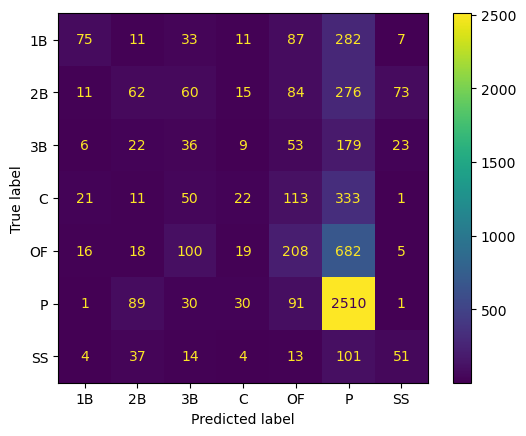

In [78]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print('Train:', nb.score(X_train, y_train).round(5), '\nTest:', nb.score(X_test, y_test).round(5))
cm = confusion_matrix(y_test,nb_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['1B','2B','3B','C','OF','P','SS'])
cm_display.plot()
plt.show()

Train: 0.7169 
Test: 0.70818


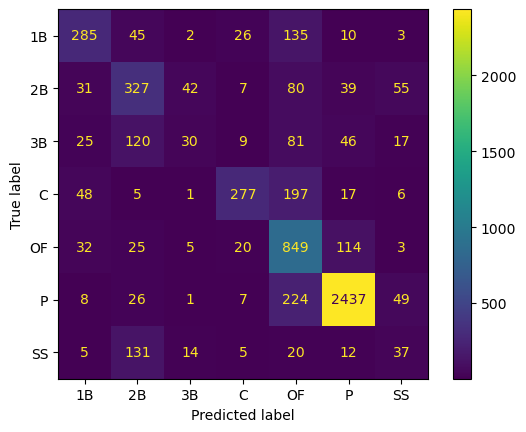

In [79]:
sgd = SGDClassifier(loss='modified_huber',shuffle=True, random_state=53)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
print('Train:', sgd.score(X_train, y_train).round(5), '\nTest:', sgd.score(X_test, y_test).round(5))
cm = confusion_matrix(y_test,sgd_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['1B','2B','3B','C','OF','P','SS'])
cm_display.plot()
plt.show()

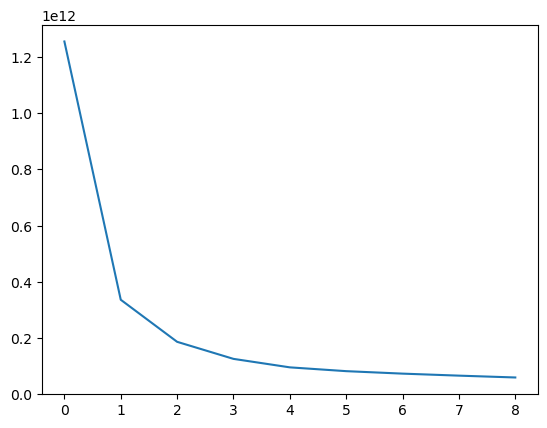

In [80]:
n_clusters = list(range(1, 10))
within_cluster_var = []
for i in n_clusters:
    clu = cluster.KMeans(n_clusters=i)
    clu = clu.fit(X_train)
    within_cluster_var.append(clu.inertia_)
plt.plot(within_cluster_var)

Train: 0.78124 
Test: 0.66811


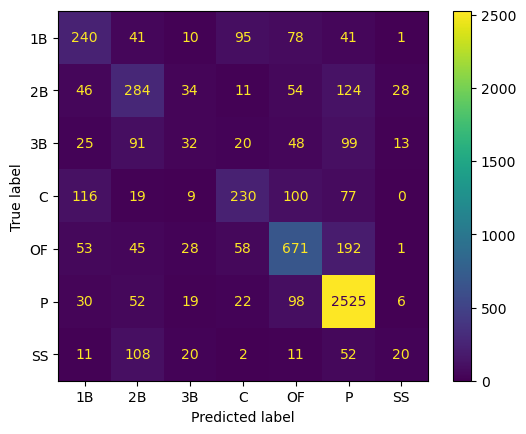

In [81]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print('Train:', knn.score(X_train, y_train).round(5), '\nTest:', knn.score(X_test, y_test).round(5))
cm = confusion_matrix(y_test,knn_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['1B','2B','3B','C','OF','P','SS'])
cm_display.plot()
plt.show()

Train: 0.99914 
Test: 0.71803


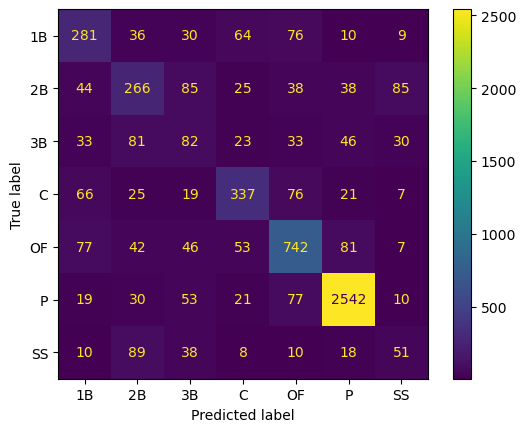

In [82]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
print('Train:', dt.score(X_train, y_train).round(5), '\nTest:', dt.score(X_test, y_test).round(5))
cm = confusion_matrix(y_test,dt_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['1B','2B','3B','C','OF','P','SS'])
cm_display.plot()
plt.show()

Train: 0.99914 
Test: 0.78865


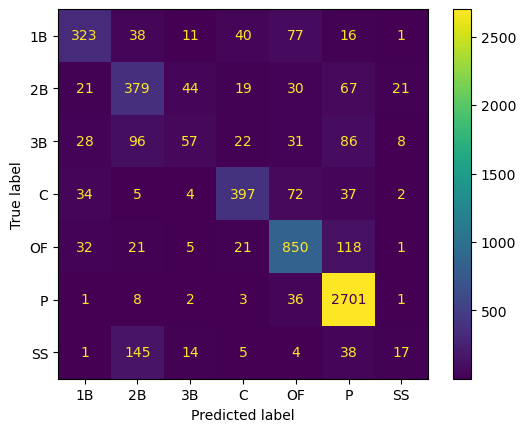

In [83]:
rf = RandomForestClassifier(n_jobs = -1, random_state=4)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print('Train:', rf.score(X_train, y_train).round(5), '\nTest:', rf.score(X_test, y_test).round(5))
cm = confusion_matrix(y_test,rf_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['1B','2B','3B','C','OF','P','SS'])
cm_display.plot()
plt.show()

In [84]:
param_grid = {'n_estimators':[int(x) for x in np.linspace(10,1000,10)],
             'min_samples_split':[2,5], 'min_samples_leaf':[.25,.5,.75,1],
             'max_features':['sqrt','log2',None],
             'bootstrap':[True,False]}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=param_grid,n_iter=10, cv=4, verbose=2, n_jobs=-1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)
print(rf_random.best_estimator_)
rf_best=rf_random.best_estimator_

Fitting 4 folds for each of 10 candidates, totalling 40 fits
{'n_estimators': 230, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}
RandomForestClassifier(max_features='sqrt', n_estimators=230, n_jobs=-1,
                       random_state=4)


Train: 0.99914 
Test: 0.79416


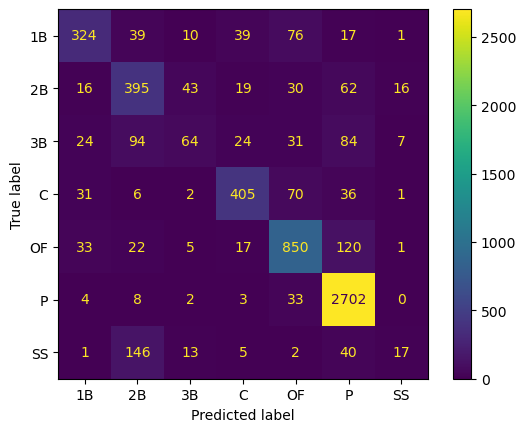

In [85]:
rf_random_pred = rf_random.predict(X_test)
print('Train:', rf_random.score(X_train, y_train).round(5), '\nTest:', rf_random.score(X_test, y_test).round(5))
cm_random = confusion_matrix(y_test,rf_random_pred)
cm_random_display = ConfusionMatrixDisplay(confusion_matrix = cm_random, display_labels = ['1B','2B','3B','C','OF','P','SS'])
cm_random_display.plot()
plt.show()

In [86]:
print(classification_report(y_test,rf_random_pred))

              precision    recall  f1-score   support

          1B       0.75      0.64      0.69       506
          2B       0.56      0.68      0.61       581
          3B       0.46      0.20      0.27       328
           C       0.79      0.74      0.76       551
          OF       0.78      0.81      0.79      1048
           P       0.88      0.98      0.93      2752
          SS       0.40      0.08      0.13       224

    accuracy                           0.79      5990
   macro avg       0.66      0.59      0.60      5990
weighted avg       0.77      0.79      0.77      5990



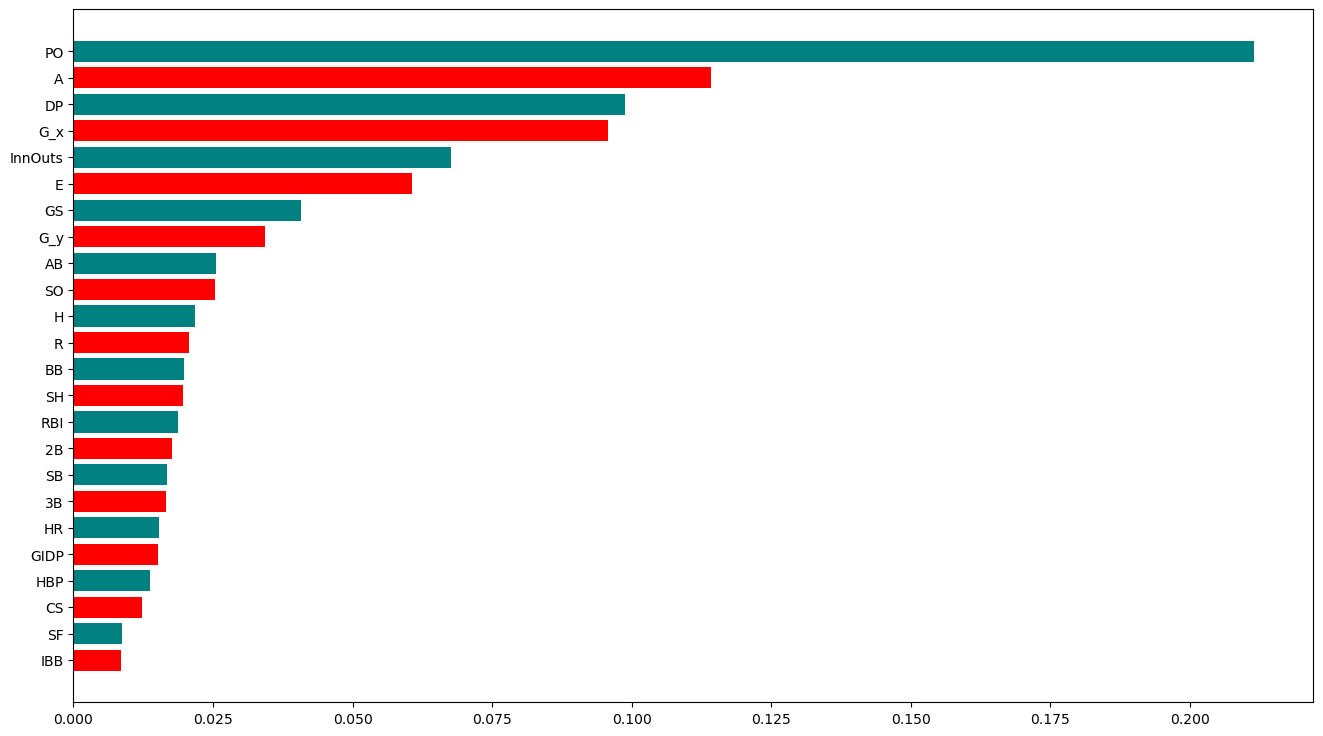

In [87]:
# get importance
importance = rf.feature_importances_
test = dict(zip(list(X),importance))
test = dict(sorted(test.items(), key=lambda item: item[1]))
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(*zip(*test.items()),color=['red','teal'])
plt.show()

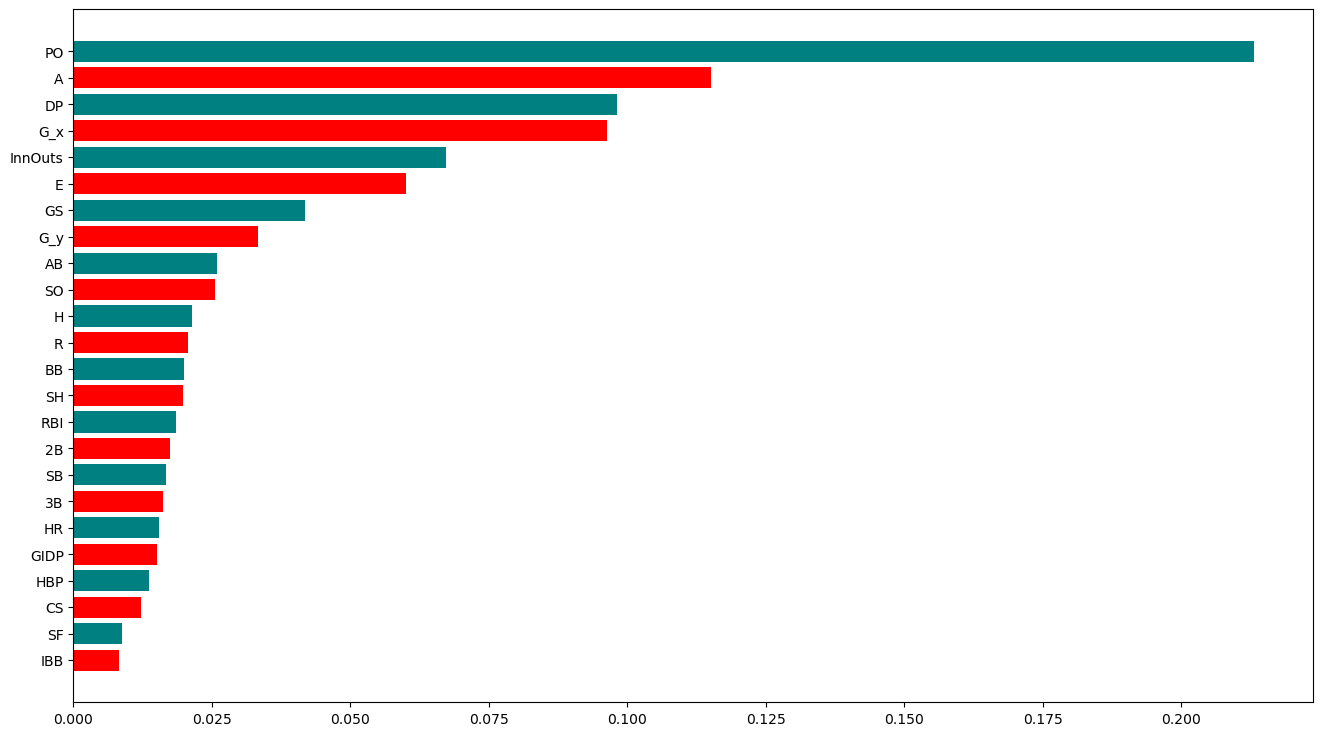

In [88]:
importance = rf_best.feature_importances_
test = dict(zip(list(X),importance))
test = dict(sorted(test.items(), key=lambda item: item[1]))
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(*zip(*test.items()),color = ['red','teal'])
plt.show()

In [89]:
models = [
    GaussianNB(),
    SGDClassifier(shuffle = True,random_state=53),
    KNeighborsClassifier(n_neighbors=4),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=0),
]

table = PrettyTable()
table.field_names = ['Model', 'Data', 'Accuracy', 'Precision', 'Recall', 'F1', 'Train Acc']

In [90]:
def fit_model(model,X_train,X_test,y_train,y_test, df_name):
    model = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = round(accuracy_score(y_test, pred), 3)
    precision = round(precision_score(y_test, pred, average ='micro'), 3)
    recall = round(np.sqrt(recall_score(y_test, pred, average ='micro')), 3)
    f1 = round(f1_score(y_test, pred, average ='micro'), 3)
    train_acc = model.score(X_train, y_train).round(3)
    table.add_row([model, df_name, acc, precision, recall, f1, train_acc]) 
    return [model, df_name, acc, precision, recall, f1, train_acc] 
results = []
fitted_models = []
for model in models:
    model_result = fit_model(model,X_train,X_test,y_train,y_test, 'features_df')
    results.append(model_result)
    fitted_models.append(model_result[0])

table

Model,Data,Accuracy,Precision,Recall,F1,Train Acc
GaussianNB(),features_df,0.495,0.495,0.703,0.495,0.493
SGDClassifier(random_state=53),features_df,0.63,0.63,0.794,0.63,0.633
KNeighborsClassifier(n_neighbors=4),features_df,0.668,0.668,0.817,0.668,0.781
DecisionTreeClassifier(random_state=42),features_df,0.718,0.718,0.847,0.718,0.999
RandomForestClassifier(random_state=0),features_df,0.794,0.794,0.891,0.794,0.999


In [91]:
@interact
def generate_report(model=fitted_models):
    """Generates desired report for specified model."""
    plt.close()
    conf_mat = plt.show(ConfusionMatrixDisplay.from_estimator(model, X_test, y_test))
    clf_rep =  print(classification_report(model.predict(X_test), y_test))

    return clf_rep 

interactive(children=(Dropdown(description='model', options=(GaussianNB(), SGDClassifier(random_state=53), KNe…

In [92]:
scaled_X = StandardScaler().fit_transform(X.values)

In [93]:
pca = PCA(n_components=4)
reduced_features = pca.fit_transform(scaled_X)

reduced_df = pd.DataFrame(reduced_features, columns=['PCA1','PCA2','PCA3','PCA4']).merge(y, on=y.index)

In [94]:
reduced_df.head()

,key_0,PCA1,PCA2,PCA3,PCA4,POS
0,aardsda01,-2.456921,0.302937,0.070861,-0.004175,P
1,aaronha01,23.213433,3.489480,-5.499755,-7.115556,OF
2,aaronto01,6.935828,-2.235096,-1.920176,-0.141427,1B
3,aasedo01,3.083855,-1.508986,-0.720184,-0.248706,P
4,abadan01,-2.619235,0.001413,0.046080,0.093742,1B


In [95]:
pca_y = reduced_df['POS']
pca_x = reduced_df.drop(['POS','key_0'], axis = 1)
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(pca_x,pca_y,test_size=0.3)

In [96]:
for model in models:
    model_result = fit_model(model,pca_x_train, pca_x_test, pca_y_train, pca_y_test, 'PCA_df')
    results.append(model_result)
    fitted_models.append(model_result[0])
table

Model,Data,Accuracy,Precision,Recall,F1,Train Acc
GaussianNB(),features_df,0.495,0.495,0.703,0.495,0.493
SGDClassifier(random_state=53),features_df,0.63,0.63,0.794,0.63,0.633
KNeighborsClassifier(n_neighbors=4),features_df,0.668,0.668,0.817,0.668,0.781
DecisionTreeClassifier(random_state=42),features_df,0.718,0.718,0.847,0.718,0.999
RandomForestClassifier(random_state=0),features_df,0.794,0.794,0.891,0.794,0.999
GaussianNB(),PCA_df,0.486,0.486,0.697,0.486,0.497
SGDClassifier(random_state=53),PCA_df,0.491,0.491,0.701,0.491,0.501
KNeighborsClassifier(n_neighbors=4),PCA_df,0.519,0.519,0.72,0.519,0.685
DecisionTreeClassifier(random_state=42),PCA_df,0.463,0.463,0.681,0.463,0.999
RandomForestClassifier(random_state=0),PCA_df,0.569,0.569,0.755,0.569,0.999


In [97]:
data = pd.DataFrame.from_records(results,columns=['Model', 'Data', 'Accuracy', 'Precision', 'Recall', 'F1', 'Train Acc'])

In [98]:
data

,Model,Data,Accuracy,Precision,Recall,F1,Train Acc
0,GaussianNB(),features_df,0.495,0.495,0.703,0.495,0.493
1,SGDClassifier(random_state=53),features_df,0.630,0.630,0.794,0.630,0.633
2,KNeighborsClassifier(n_neighbors=4),features_df,0.668,0.668,0.817,0.668,0.781
3,DecisionTreeClassifier(random_state=42),features_df,0.718,0.718,0.847,0.718,0.999
4,"(DecisionTreeClassifier(max_features='auto', r...",features_df,0.794,0.794,0.891,0.794,0.999
5,GaussianNB(),PCA_df,0.486,0.486,0.697,0.486,0.497
6,SGDClassifier(random_state=53),PCA_df,0.491,0.491,0.701,0.491,0.501
7,KNeighborsClassifier(n_neighbors=4),PCA_df,0.519,0.519,0.720,0.519,0.685
8,DecisionTreeClassifier(random_state=42),PCA_df,0.463,0.463,0.681,0.463,0.999
9,"(DecisionTreeClassifier(max_features='auto', r...",PCA_df,0.569,0.569,0.755,0.569,0.999


<AxesSubplot:xlabel='Data', ylabel='Train Acc'>

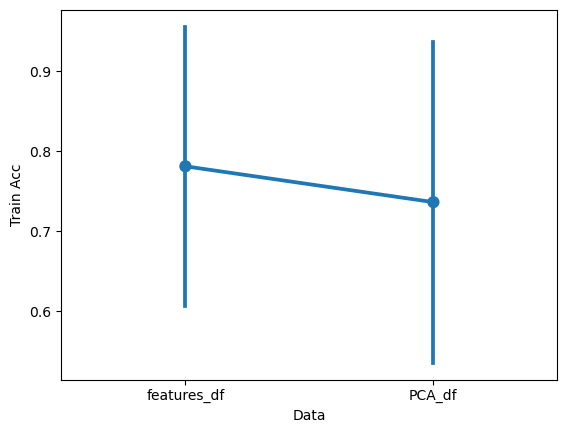

In [99]:
sns.pointplot(data=data, x ='Data',y='Train Acc')

<AxesSubplot:xlabel='Accuracy', ylabel='Train Acc'>

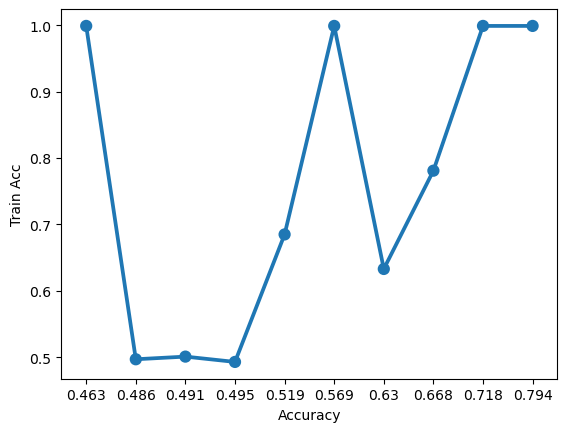

In [100]:
sns.pointplot(data=data, x='Accuracy', y='Train Acc')